In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Assignment/ML/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#size of the dataset

df.shape

(20640, 10)

In [4]:
# datatypes for each column

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
# statistical summary for all columns.

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning

In [6]:
# Checking for missing values.

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# dropping rows which has mising values

df.dropna(inplace=True)

## EDA

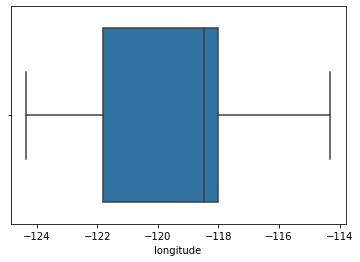

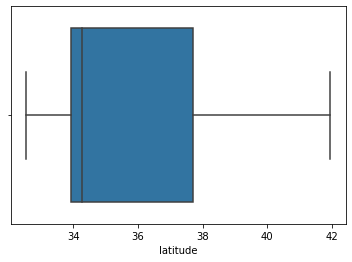

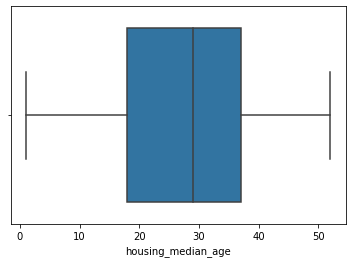

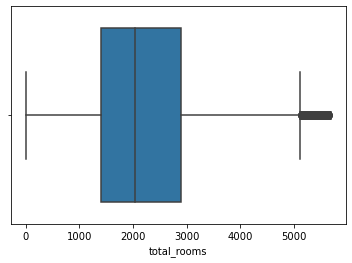

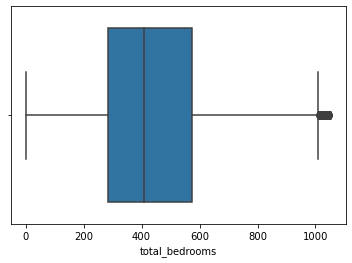

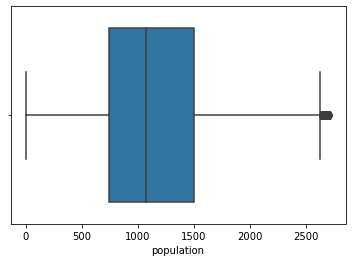

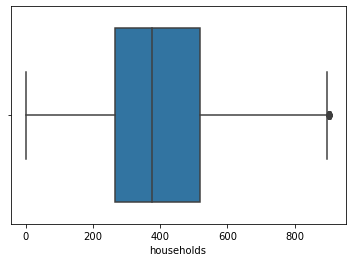

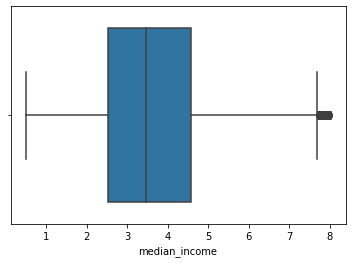

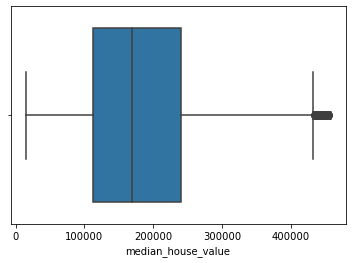

In [8]:
# Outlier Analysis

col = df.drop('ocean_proximity', axis=1).columns

for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df = df[(df[i]>lower) & (df[i]<upper)]
    plt.figure()
    sns.boxplot(data=df, x=df[i])

In [9]:
df.reset_index(drop=True, inplace=True)

### Scatter Plot - Median Income vs Median House Value

Text(0.5, 1.0, 'Median Income vs Median House Value')

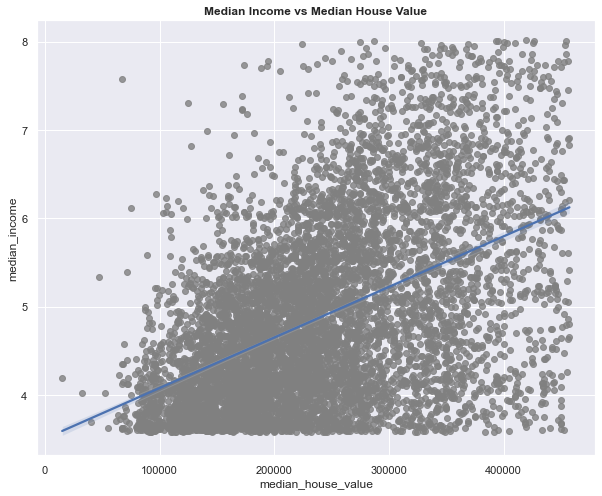

In [113]:
df1 = df[df['median_income']>df['median_income'].mean()]


plt.figure(figsize=(10,8))
sns.regplot(data=df1, x='median_house_value', y='median_income', scatter_kws={'color': 'grey'})
plt.title('Median Income vs Median House Value', fontweight = 'bold')

### Distribution of median house values by Ocean Proximity

<Figure size 432x288 with 0 Axes>

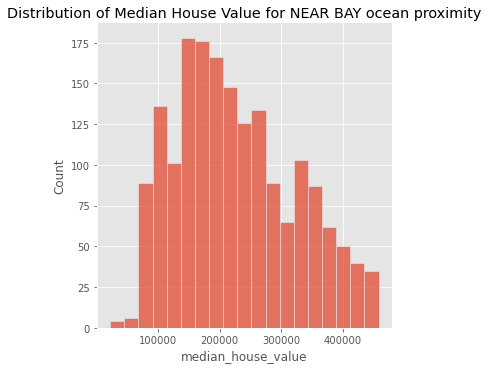

<Figure size 432x288 with 0 Axes>

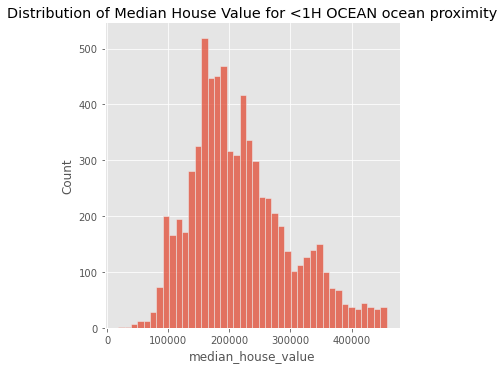

<Figure size 432x288 with 0 Axes>

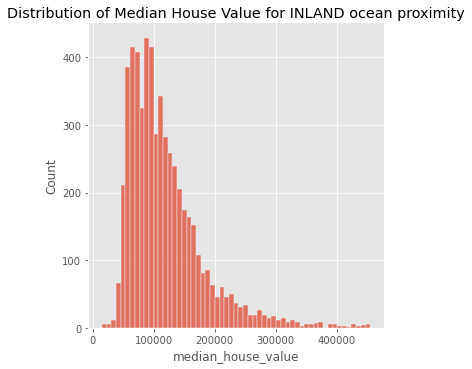

<Figure size 432x288 with 0 Axes>

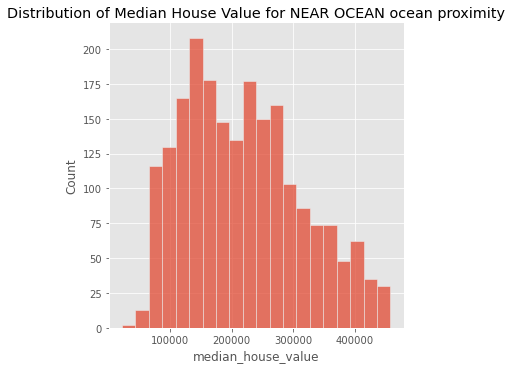

<Figure size 432x288 with 0 Axes>

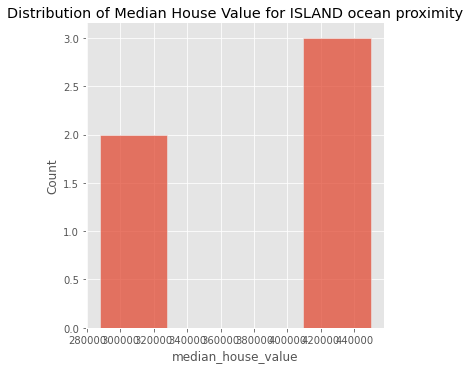

In [42]:
for i in df['ocean_proximity'].unique():

    plt.figure()
    sns.displot(df[df['ocean_proximity']==i]['median_house_value'])
    plt.title('Distribution of Median House Value for {} ocean proximity'.format(i))

Text(0.5, 1.0, 'House Values by Ocean Proximity')

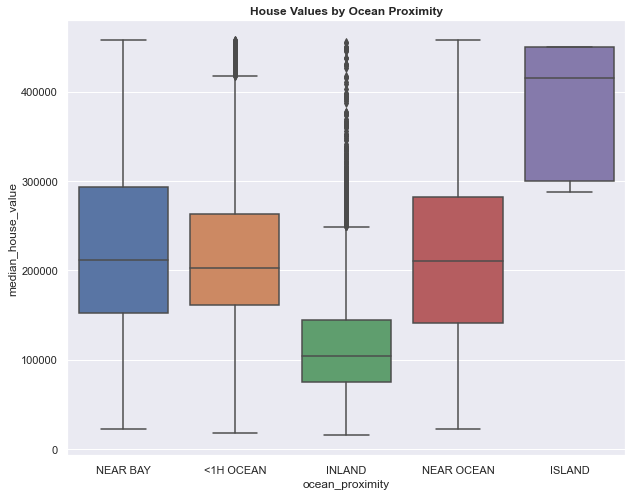

In [112]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='median_house_value', x='ocean_proximity')
plt.title('House Values by Ocean Proximity', fontweight='bold')

Insights - Island houses are more expensive compared to the others.

### Age of House vs No of Rooms 

Text(0.5, 1.0, 'Age of House vs No of Rooms')

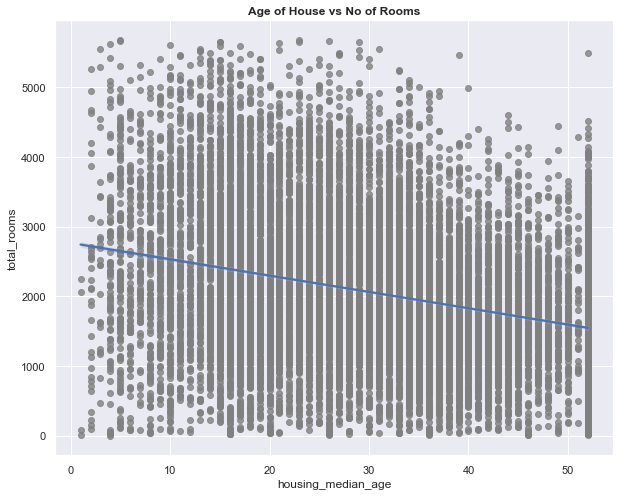

In [111]:

plt.figure(figsize=(10,8))
sns.regplot(data=df, x='housing_median_age', y='total_rooms', scatter_kws={'color' : 'grey'})
plt.title('Age of House vs No of Rooms', fontweight='bold')

Insights - The older houses have fewer rooms than newer houses.

### Population Density by Ocean Proximity

Text(0.5, 1.0, 'Population Density by Ocean Proximity')

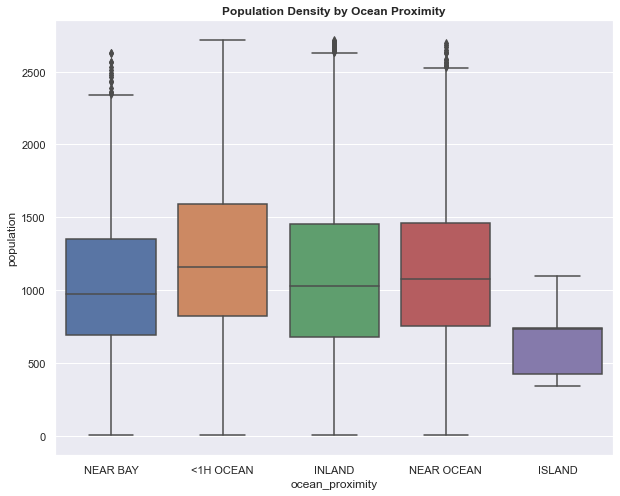

In [110]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='population', x='ocean_proximity')
plt.title('Population Density by Ocean Proximity', fontweight='bold')

Insights - The blocks near the ocean are less populated than those located farther away.

### Number of bedrooms VS Number of rooms 

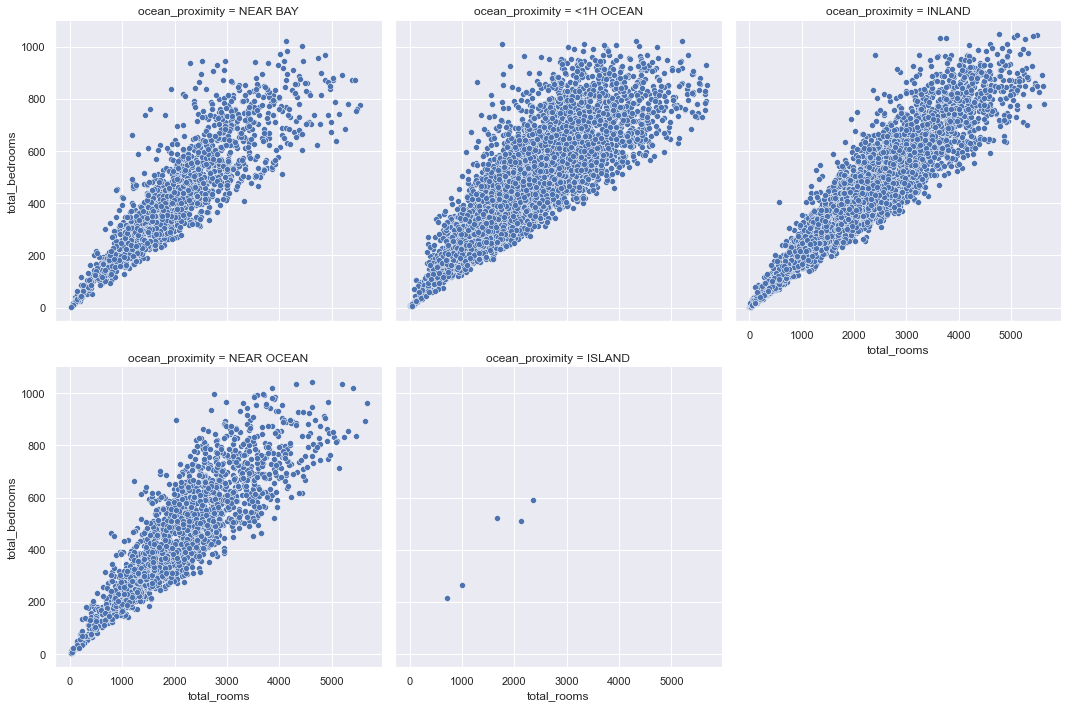

In [85]:
sns.relplot(data=df, x='total_rooms', y='total_bedrooms', col='ocean_proximity', col_wrap=3)

Insights - There is a consistent ratio of bedrooms to rooms across different blocks. Number of rooms and bedrooms are linearly correlated.

### Median Income VS Age

Text(0.5, 1.0, 'Median Income VS Age')

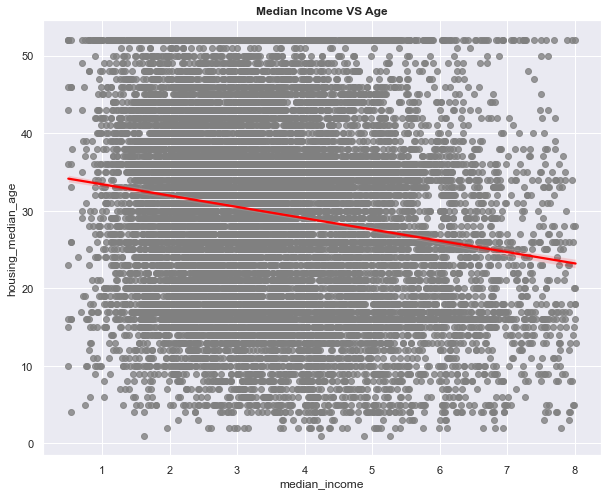

In [109]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='median_income', y='housing_median_age', scatter_kws={'color' : 'grey'}, line_kws={'color': 'red'})
plt.title('Median Income VS Age', fontweight='bold')

In [96]:
bins = [0, 4, 6, 8, 10]
labels = ['L', 'M', 'H', 'VH']
df['income_level'] = pd.cut(x = df['median_income'], bins = bins, labels = labels, include_lowest = True)

Text(0.5, 1.0, 'House Age by Income Level')

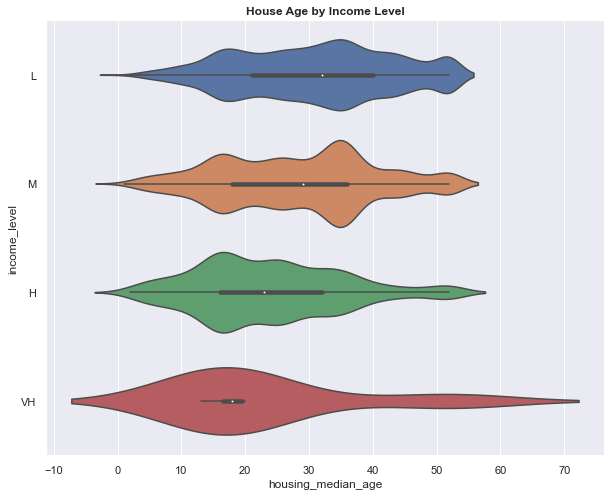

In [108]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x="housing_median_age", y="income_level")
plt.title('House Age by Income Level', fontweight='bold')

Insights - Most of the newer buildings are generally associated with higher median incomes. Average house age of high income category is less than 20.

### Households VS Population

Text(0.5, 1.0, 'Households VS Population')

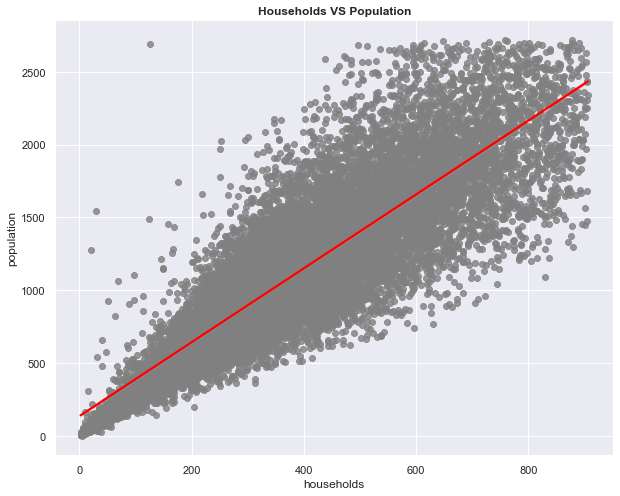

In [107]:
plt.figure(figsize=(10,8))
sns.regplot(data=df, x='households', y='population', scatter_kws={'color' : 'grey'}, line_kws={'color': 'red'})
plt.title('Households VS Population', fontweight='bold')

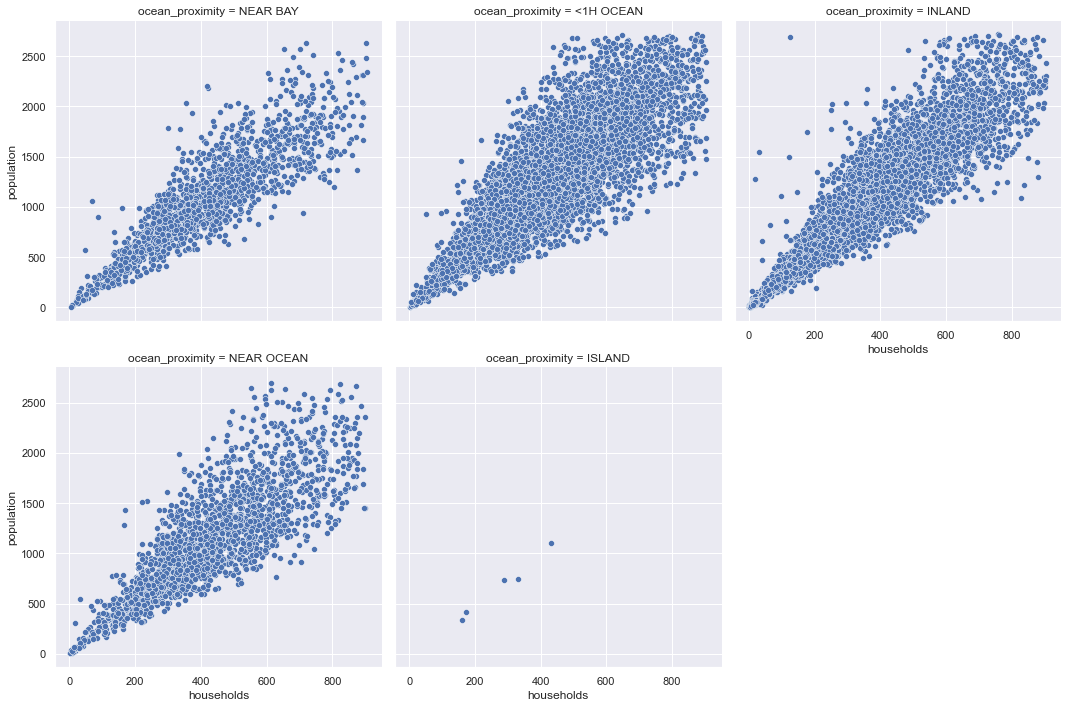

In [102]:
sns.relplot(data=df, x='households', y='population', col='ocean_proximity', col_wrap=3)

Insights - The number of households in a block increases with increase in the total population.

### Block Wise Distribution of Houses

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

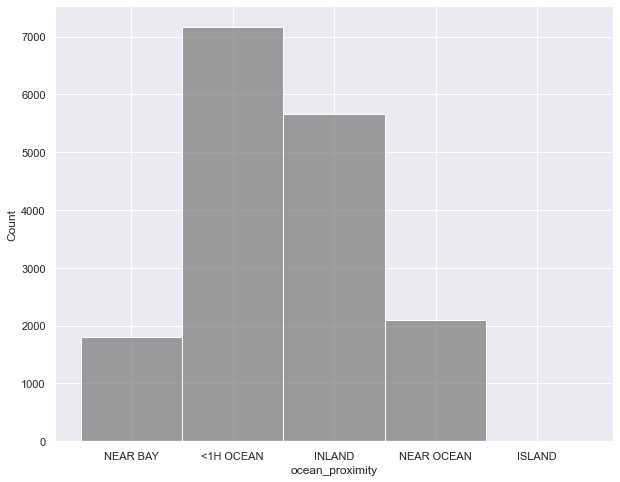

In [106]:
plt.figure(figsize=(10,8))
sns.histplot(data=df['ocean_proximity'], color='grey')
plt.title('Block Wise Distribution of Houses', fontweight='bold')

Insights - <1H Ocean is the most common ocean proximity category in the dataset.

### Households VS Total Rooms

Text(0.5, 1.0, 'Households VS Total Rooms')

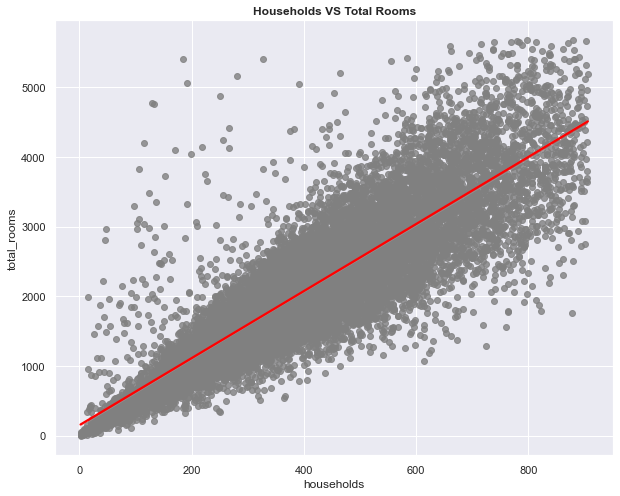

In [114]:
plt.figure(figsize=(10,8))
sns.regplot(data=df, x='households', y='total_rooms', scatter_kws={'color' : 'grey'}, line_kws={'color': 'red'})
plt.title('Households VS Total Rooms', fontweight='bold')